# 2. 가장 큰 수

[문제](https://programmers.co.kr/learn/courses/30/lessons/42746)

### 1) 1차 입력

In [ ]:
def solution(numbers):
    a = [str(digit) for digit in numbers]
    answer = ''.join(sorted(a, key=lambda x:x[0], reverse=True))
    return answer

In [21]:
solution([6,10,2])

'6210'

#### 입력결과 : fail

```python
[3, 30, 34, 5, 9]
기댓값 > "9534330"
실행 결과 > 실행한 결괏값 "9533034"이(가) 기댓값 "9534330"와(과) 다릅니다.
```

#### 틀린 이유

일의 자리 외의 자릿수가 같은 경우 등을 고려하지 못함

### 2) 2차 입력

다중조건을 적용해,

```python

1. 가장 앞자리 비교해 내림차순 ex) 10 20 -> 20 10
    - key ==>> lambda x: int(x[0])

2. 가장 앞자리가 같은데 단위가 다르다면, 낮은 단위의 숫자 먼저 ex) 60 6 -> 6 60 / 120 12 -> 12 120
    - key ==>> lambda x: -len(x)

3. 가장 앞자리가 같은데 단위가 같다면, 숫자 그대로 비교
    - key ==>> lambda x: x

```

**참고**
- [lambda 다중조건](https://dailyheumsi.tistory.com/67)

In [120]:
def solution(numbers):
    a = [str(digit) for digit in numbers]
    b = sorted(a, key=lambda x: (int(x[0]), -len(x), x), reverse=True)
    print(b)

In [122]:
solution([3, 30, 34, 5, 9])

['9', '5', '3', '34', '30']


#### 입력결과 : fail

**solution([3, 30, 34, 5, 9]) 케이스 통과 X**

- 출력값 : 9 5 3 34 30 
- 기대값 : 9 5 34 3 30

3과 34의 정렬기준 충족 못함

### 3) 3차 입력

결국엔..
참고..

[참고한 블로그](https://eda-ai-lab.tistory.com/467)

[참고한 블로그 2](https://blackinkgj.github.io/python-custom-comparator/)


In [31]:
import functools

def compare_func(num1,num2):
    a = num1 + num2
    b = num2 + num1
    
    if int(a) > int(b):  # 원래 순서대로 정렬
        return 1
    elif int(a) == int(b):
        return 0
    else:
        return -1
        
def solution(numbers):
    a = [str(digit) for digit in numbers]
    answer = ''.join(sorted(a, key=functools.cmp_to_key(compare_func), reverse=True))
    return answer

In [32]:
solution([3, 30, 34, 5, 9])

'9534330'

#### 입력결과 : fail

test case 11 실패

### 4) 4차 입력

[테스트 케이스 질문 글 참고](https://programmers.co.kr/questions/7482)

```python
[test case 11]
0, 0, 0, 0 -> 0 이 되어야 함 (하지만, '0000'이 출력됨)


[test case 11을 통해 알아낸 '틀린 원인']
숫자를 string으로 변환하는 이유는 정답(출력)크기 때문.
결국 형식은 string이지만, 숫자를 출력해야하는 것.
따라서,

1. 정렬 -> string 상태에서 진행 # str( ) <- line 15
2. 정답 -> 정렬 결과를 int로 변환 # int( ) <- line 16
3. 출력 -> 다시 string으로 변환 # str( ) <- line 16

을 거쳐야 하는 것
```

In [29]:
import functools

def compare_func(num1,num2):
    a = num1 + num2
    b = num2 + num1
    
    if int(a) > int(b): 
        return 1   # 1 : sorted 시, num1이 더 큰 것임을 sorted에 전달 (먼저 전달 받은 것이 큼)
    elif int(a) == int(b):
        return 0   # 0 : sorted 시, num1 과 num2 가 같음을 sorted에 전달
    else:
        return -1   # -1 : sorted 시, num2가 더 큰 것임을 sorted에 전달
        
def solution(numbers):
    a = [str(digit) for digit in numbers]
    answer = str(int(''.join(sorted(a, key=functools.cmp_to_key(compare_func), reverse=True))))
    return answer

In [30]:
solution([0, 0, 0, 0, 0])

'0'

In [33]:
solution([3, 30, 34, 5, 9])

'9534330'

In [35]:
solution([6,60,67])

'67660'

In [37]:
from IPython.display import Image

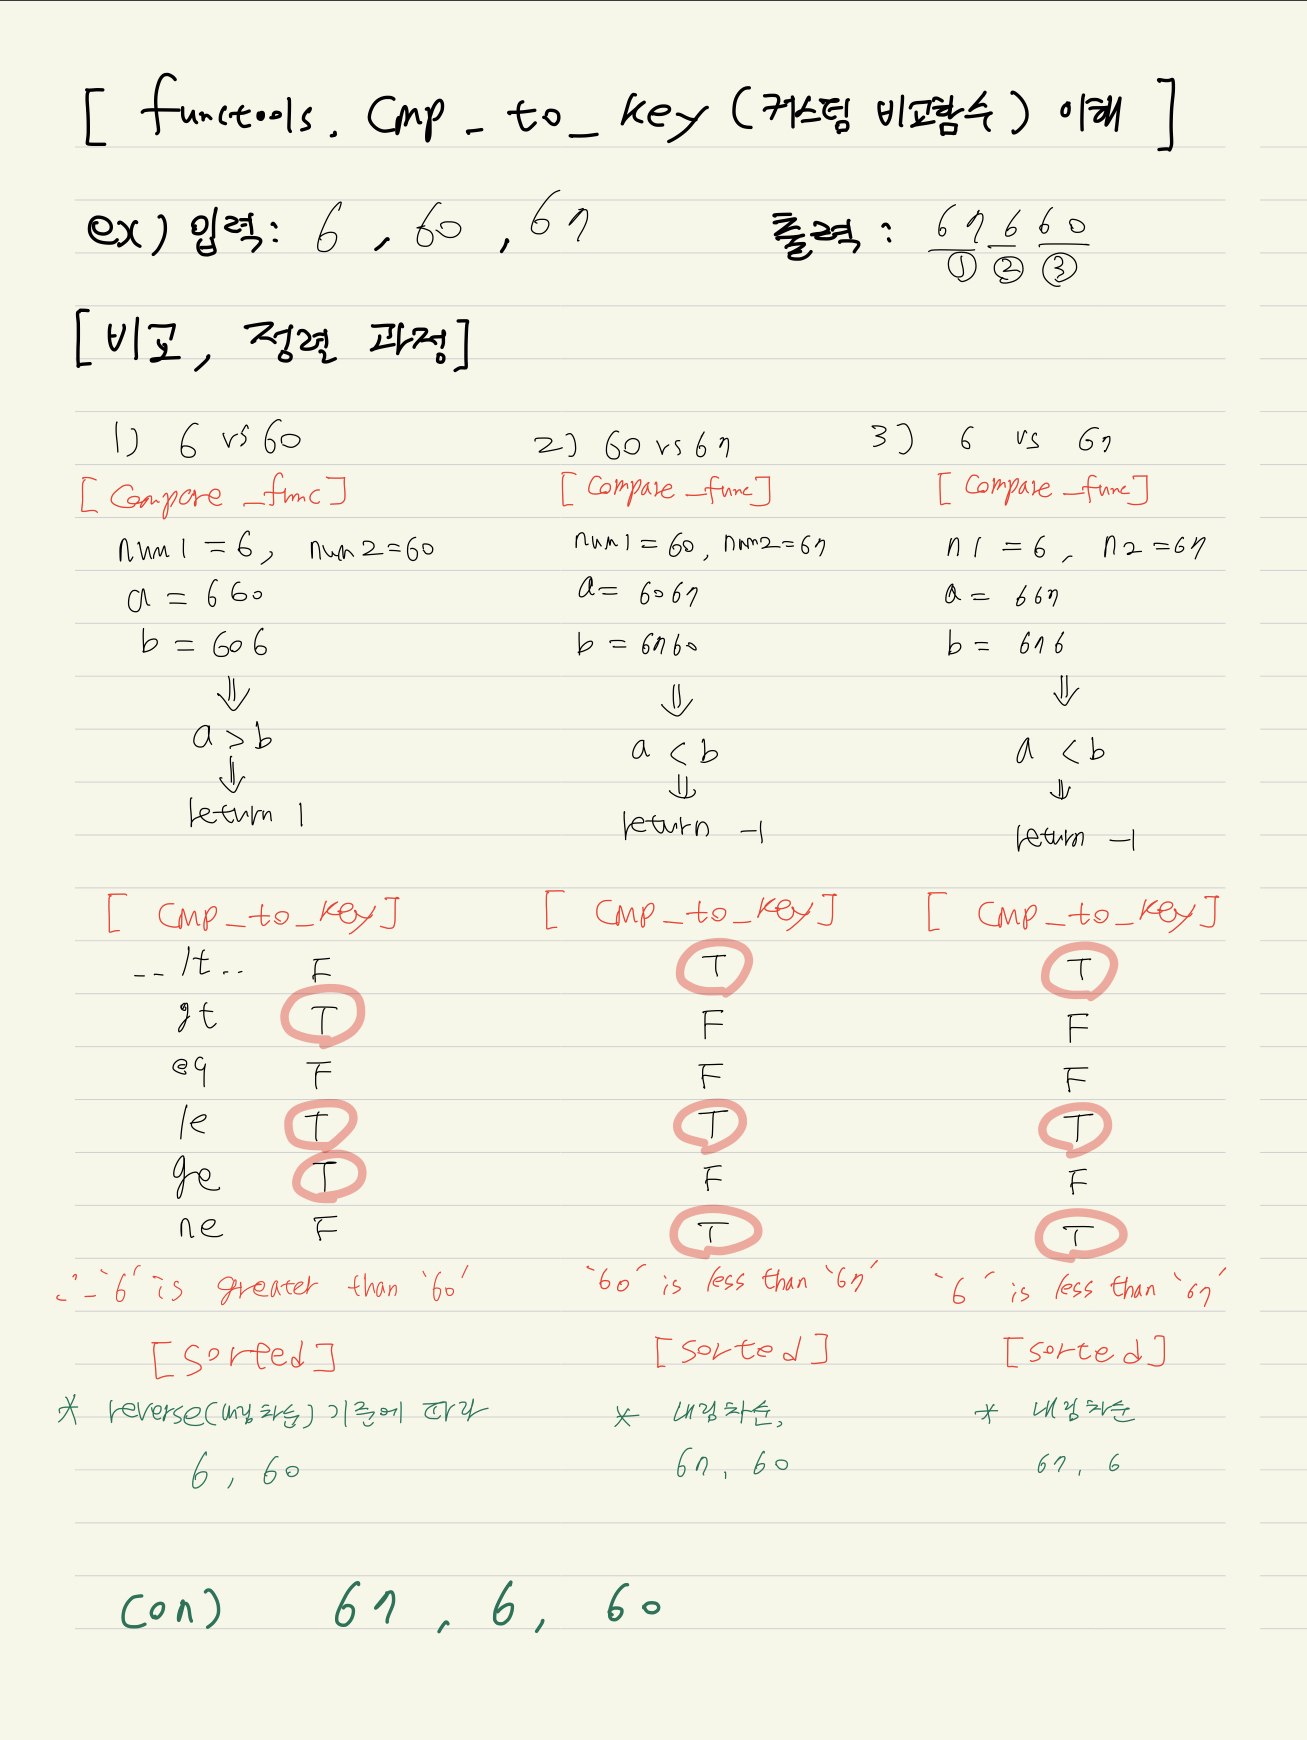

In [38]:
Image('/Users/kimjeongseob/Desktop/Study/1.Study/2. with computer/4.Programming/1.Algorithms/3.Algorithms_study/0. 기타 정리("파이썬 알고리즘 인터뷰(박상길)")/참고자료/python_cmp_to_key_ex.jpeg')

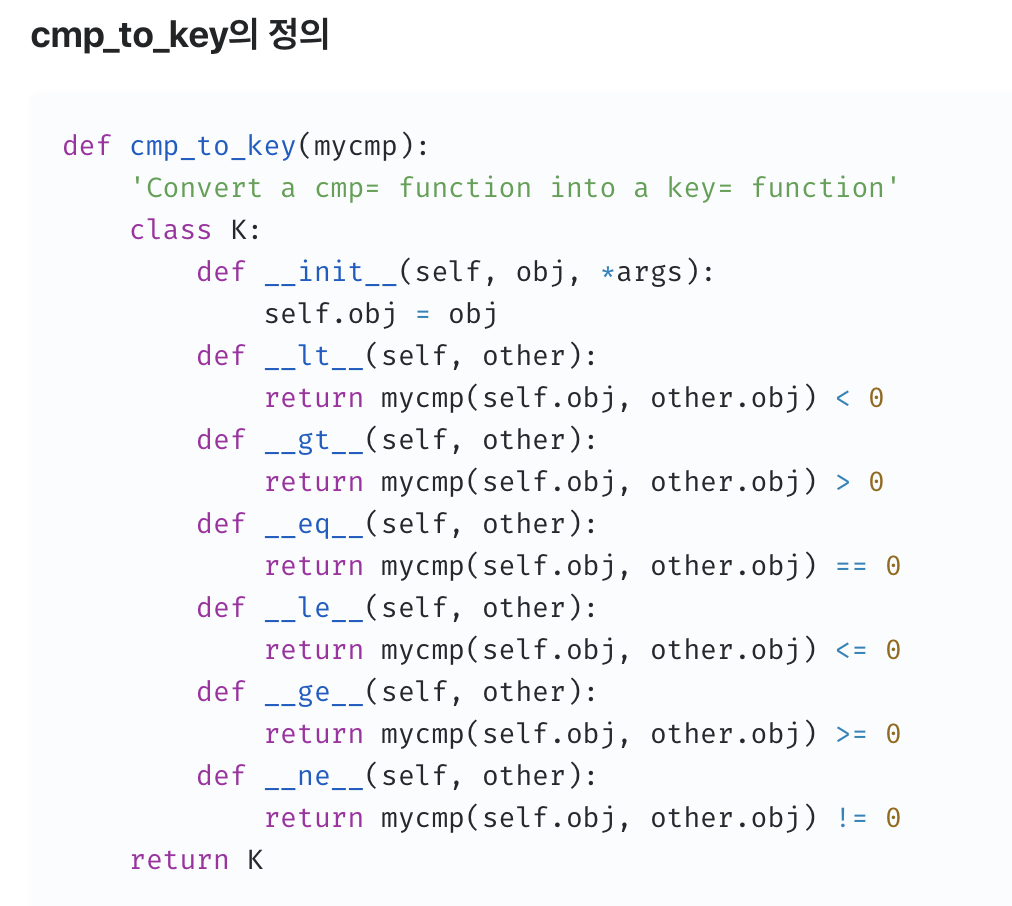

In [39]:
Image('/Users/kimjeongseob/Desktop/Study/1.Study/2. with computer/4.Programming/1.Algorithms/3.Algorithms_study/0. 기타 정리("파이썬 알고리즘 인터뷰(박상길)")/참고자료/python_cmp_to_key.png')